# Development of a condition monitoring system for wind turbine bearings using machine learning

# 1.0 Introduction

The wind energy technology can be considered as one of the most competitive technologies when it comes to renewable energy generation. It works around a center figure, the wind turbine, and their operations and maintenance (O&M) activities ins responsible for a great deal of its competitiveness, being responsible for around 30% of the overall cost of energy (LCOE). 

Nowadays, most of the wind turbines are monitored by SCADA (Supervisory Control and Data Aquisition) systems due to its ease of implementation and low cost. However, these systems present limitations related to lack of data (due to the discontinuity of data samples, which are usually taken in 10 min range) and lack of falt identification in sensors, for instance.

Therefore, extracting useful information from SCADA data can be powerful for building tools that can predict the behavior of wind turbine components, and that's where Data Science can come in to play.

In order to do that, this notebook is part of a master's thesis aiming at testing different machine learning algorithms with SCADA data in order to create a Condition Monitoring System that can be useful for the Brazilian wind energy companies. The chosen methods and components to be monitored are the result of an extensive systematic literature review as well as interviews with O&M specialists of wind power plants. Section two of the notebook will go deeper on the methodology, section three...

# 2.0 Research Method

The research method of the Thesis follows the scheme presented in the following Figure 1:

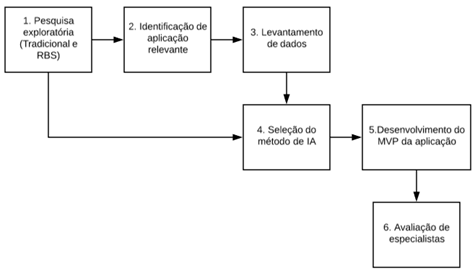
First off all, it was performed a systematic literature review using the Periodicos Capes platform. As a result, it was found 51 articles related to the themes Wind Energy, Operations and Maintenance and Artificial Intelligence. These articles were then analyzed in order to extract the best results, methods and Wind turbine components that were the object of these articles.

By having this analysis completed, we presented it to an O&M Wind Farm specialist, in order to find out which applications could be useful in the Brazilian wind farms context. In this interview/conversation, it was clear that the bearing was the biggest concern of the specialist because they usually fail without warning. In other words, a CMS for wind turbine bearings would be a good fit in the expert's opinion.

In this sense, we searched for the best results related to bearings inside the systematic literature review analysis and found that the method presented in Schleichtingen and Santos (2011) had the best results in early detection of faults in wind turbine generator and gearbox bearings. Also, we discussed with the expert if it would about the availability of Data for developing this research, coming to the conclusion that it would be available.

Therefore, the purpose of this notebook is to develop the method presented by Schaleichtingen e Santos (2011) with SCADA data from a Brazilian Wind Farm. Also, we are going to try to improve it adding some up to date methods.

### 2.1 Pipeline

This notebook aims at follow the pipeline presented in the Figure:

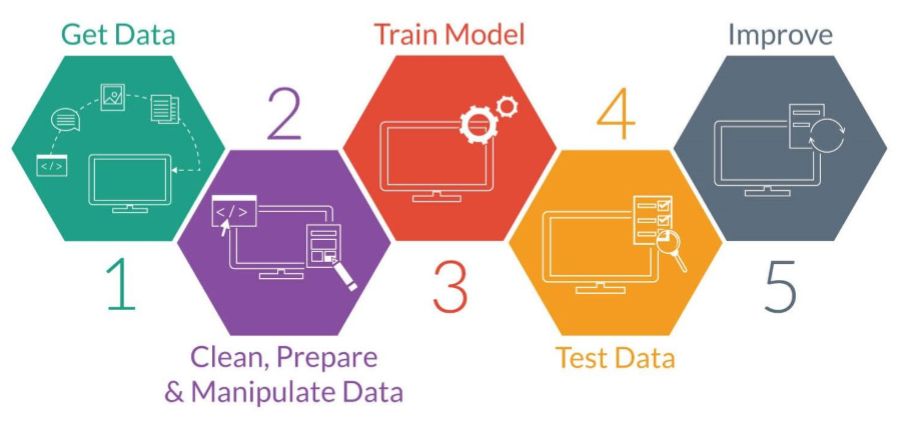

# 3.0 Geting Data

The data we are going to use for building this project is offered from a SCADA system of wind turbines located in Brazil using the same measures of Schleichtingen e Santos (2011). We collected data from more than 90 wind turbines from the same wind farm. The data was collected from since the beggining of this wind farm operations, in 2011, ending in 2019. At first, we are going to use the SCADA data from wind turbine 2 16, because it presented failure in the front gen bearing faster than any other turbine in the wind power plant.

## 3.1 Taking a quick look at the data

In [1]:
import pandas as pd

df = pd.DataFrame(pd.read_excel('AL2 WTG16.xlsx'))
print(df.head())

          PCTimeStamp  A2WTG16_Avr.nacelle temp.°C (47)  \
0 2011-01-01 00:00:00                               NaN   
1 2011-01-01 00:10:00                               NaN   
2 2011-01-01 00:20:00                               NaN   
3 2011-01-01 00:30:00                               NaN   
4 2011-01-01 00:40:00                               NaN   

   A2WTG16_Avr.gen.speed,RPM (47)  A2WTG16_Avr.W1 temp.large gen.°C (47)  \
0                             NaN                                    NaN   
1                             NaN                                    NaN   
2                             NaN                                    NaN   
3                             NaN                                    NaN   
4                             NaN                                    NaN   

   A2WTG16_Avr.W2 temp.large gen.°C (47)  \
0                                    NaN   
1                                    NaN   
2                                    NaN   
3           

In [2]:
#Renaming the colunms in a more comprehensive way

cols = ['Date/Time', 
        'Nacelle Temperature (°C)', 
        'High Speed Shaft Rotation (RPM)',
        'Winding1_Temp(°C)',
        'Winding2_Temp(°C)',
        'Winding3_Temp(°C)',
        'Winding Temperature (°C)',
        'Active Power (kW)',
        'Gearbox_oil_Temp(°C)',
        'Amb_Temp(°C)',
        'Front Gen Bearing Temp (°C)',
        'Gear_Bearing_Temp(°C)',
        ]



df.columns = cols

df = df.set_index('Date/Time')

df.head()

,Nacelle Temperature (°C),High Speed Shaft Rotation (RPM),Winding1_Temp(°C),Winding2_Temp(°C),Winding3_Temp(°C),Winding Temperature (°C),Active Power (kW),Gearbox_oil_Temp(°C),Amb_Temp(°C),Front Gen Bearing Temp (°C),Gear_Bearing_Temp(°C)
Date/Time,,,,,,,,,,,
2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-01 00:10:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-01 00:20:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-01 00:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-01 00:40:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


From the table, each row represents a data instance collected from SCADA, and each column represent its nature. The data was taken according to the following figure presented by Schleichtingen and Santos (2011):
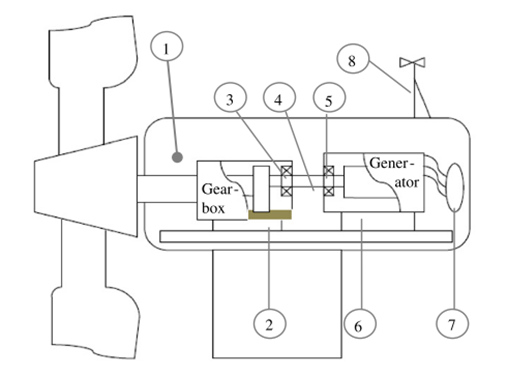

- **Nacele Temp(°C):** Represents da Nascelle temperature in °C (1);
- **Generator Spd(RPM):** The gen shaft speed in RPM (4);
- **Winding(1, 2 and 3) Temp(°C):** Gen whirling temperature of each phase in °C;
- **Winding avg temp(°C)(°C)**: Average gen whirling temperature in °C (6);
- **Active Power(kW):** Intant Power output in KW (7);
- **Gearbox oil Temp(°C):** Gearbox oil temperature in °C (2);
- **Amb Temp(°C)**: Ambient temperature in °C (8);
- **Gen Bearing Temp(°C):** Generator bearing temperature in °C **[Target]** (3);
- **Gear Bearing Temp(°C):** Gearbox bearing temperature in °C **[Target]** (5);


In [3]:
# Using info to get particular description of the data

df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 450390 entries, 2011-01-01 00:00:00 to NaT
Data columns (total 11 columns):
Nacelle Temperature (°C)           321866 non-null float64
High Speed Shaft Rotation (RPM)    322012 non-null float64
Winding1_Temp(°C)                  322042 non-null float64
Winding2_Temp(°C)                  320109 non-null float64
Winding3_Temp(°C)                  205491 non-null float64
Winding Temperature (°C)           322148 non-null float64
Active Power (kW)                  322141 non-null float64
Gearbox_oil_Temp(°C)               321758 non-null float64
Amb_Temp(°C)                       266647 non-null float64
Front Gen Bearing Temp (°C)        321993 non-null float64
Gear_Bearing_Temp(°C)              321860 non-null float64
dtypes: float64(11)
memory usage: 41.2 MB


From the information above, one can see that the data contains 450390 entries in total, however, there are alot of missing values since the attributes have around 322000 non-null values. Also, the Ambiente Temp attribute has even lower entries (around 290000).

In order to meet machine learning standards all columns must have the same amount of data entries, therefore, we have to take care of this latter on.

In [4]:
# showing a summary of the numerical atributes

df.describe()

,Nacelle Temperature (°C),High Speed Shaft Rotation (RPM),Winding1_Temp(°C),Winding2_Temp(°C),Winding3_Temp(°C),Winding Temperature (°C),Active Power (kW),Gearbox_oil_Temp(°C),Amb_Temp(°C),Front Gen Bearing Temp (°C),Gear_Bearing_Temp(°C)
count,321866.000000,322012.000000,322042.000000,320109.000000,205491.000000,322148.000000,322141.000000,321758.000000,266647.000000,321993.000000,321860.000000
mean,37.516578,1160.467448,65.381627,64.615197,68.001348,67.096046,524.139093,53.804959,30.984995,58.716121,60.585699
std,1.403075,187.007939,15.845047,14.734058,15.738064,15.804360,463.387387,2.040366,3.379957,7.362152,2.748628
min,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,-44.600000,0.000000,0.000000,0.000000,0.000000
25%,37.000000,1201.000000,56.000000,56.000000,59.000000,57.000000,143.000000,52.000000,29.000000,54.000000,59.000000
50%,37.000000,1202.000000,59.000000,59.000000,62.000000,62.000000,402.200000,53.000000,31.000000,57.000000,61.000000
75%,38.000000,1205.000000,70.000000,69.000000,73.000000,72.000000,805.100000,55.000000,33.000000,62.000000,62.000000
max,105.000000,1217.000000,129.000000,160.000000,225.000000,225.000000,1677.100000,61.000000,225.000000,90.000000,68.000000


## 3.2 Histogram

In order to get a feel of the data and see how it behaves, we ploted a histogram for each numerical attribute of the dataset:

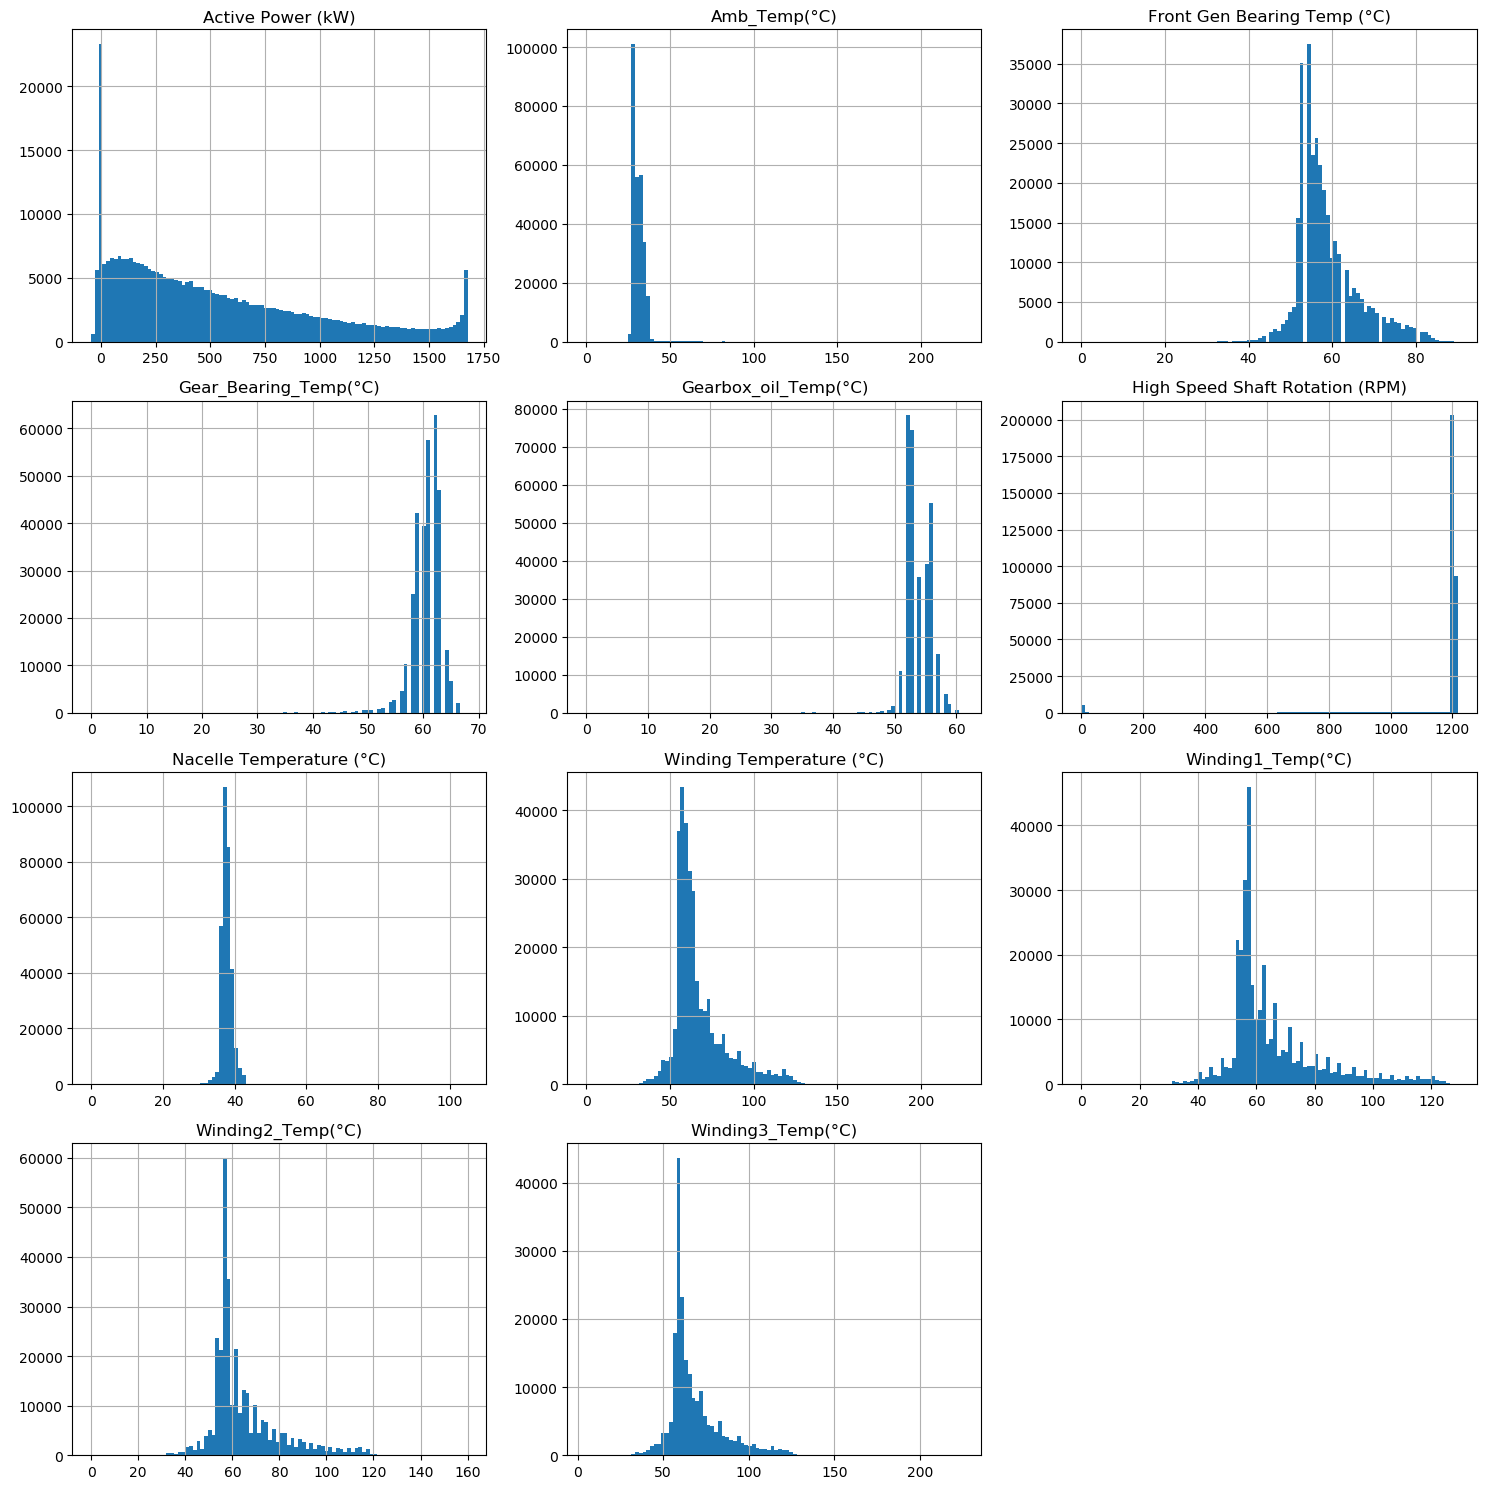

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use("default") 
df.hist(bins=100, figsize=(15,15))
plt.tight_layout()
plt.show()

A quick discussion about the data behaviour:

- **Active Power(kW):** The Active Power (or Power Output) varies much more than the others, wich is expected because it depends on climatic attributes such as wind speed. It also have some peak values which may be caused by outliers. These outliers may be caused by tests when the turbine is put under extreme working condition in order to get tested.
- **Ambient Temp(°C), Nacelle Temp(°C)**: Do not vary much and are similar, as the Nacelle Temperature depends most on Ambient Temperature which does not varies much due to the climate conditions of the region where the wind farm is placed, which does maintains almost the same in the northeast region of Brazil. 
- **Gearbox oil Temp(°C):** The Gearbox Oil Temperature does not vary much as well. It serves as lubricant a coolant for the gearbox system and, as it is not near any type of combustion system, is expected to stay still at at the same Temperature.
- **Generator Spd(RPM):** The generator is set to work in a similar velocity when the turbine is working, therefore it is expected to have low variance in working conditions and zero velocity for when the turbine is not working.
- **Windding Temperature(°C):** The winding temperature varies with the current because of the Jaule efect. It is expected to have high variance, because the current also varies a lot.
- **Gen Bearing Temp(°C), Gear Bearing Temp(°C):** The gearbox bearing temperature have much bigger variance than the generator bearing temperature even though they have almost the same mean value.


## 3.3 Seasonality Analisys

In this section we are going to make a sesonality analysis of the dataframe, in order to show how the most important variables behave.

In [6]:
df_sa = df.copy()
df_sa_nan = df_sa.dropna()

index_month = df_sa_nan.index.month
df_sa_month = df_sa_nan.groupby(index_month).mean()
df_sa_month = df_sa_month.drop(['Winding1_Temp(°C)', 'Winding2_Temp(°C)', 'Winding3_Temp(°C)'], axis=1)

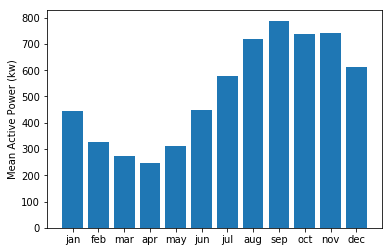

In [7]:
months = ['jan', 'feb', 'mar', 'apr', 'may', 'jun',
                    'jul', 'aug', 'sep', 'oct', 'nov', 'dec']

fig, ax = plt.subplots()

ax.bar(months, df_sa_month['Active Power (kW)'])
ax.set_ylabel("Mean Active Power (kw)") 
plt.show()

In [8]:
print(df_sa_month['Active Power (kW)'])

Date/Time
1     445.089178
2     328.265769
3     271.983255
4     247.215943
5     311.703320
6     447.068943
7     577.149987
8     720.742654
9     788.471577
10    739.406241
11    740.651228
12    611.196546
Name: Active Power (kW), dtype: float64


From the graph, it seems that the months with max power output mean are september, october and november, while march, april and may have the lowest output means. It can indicate the months were major maintenance activities should be held in order to not jeopardize the machine energy production. It also may be an indicator of which part of the dataset should serve as training data for the model.

Lets see how the bearing temperature behaves over the year.

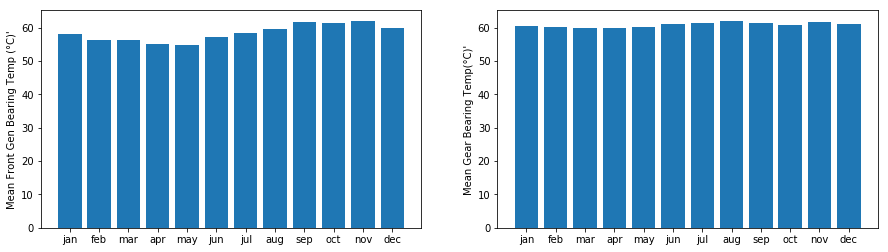

In [9]:
fig, ax = plt.subplots(1, 2, figsize=(15,4))

ax0 = ax[0].bar(months, df_sa_month['Front Gen Bearing Temp (°C)'])
ax[0].set_ylabel("Mean Front Gen Bearing Temp (°C)'") 

ax1 = ax[1].bar(months, df_sa_month['Gear_Bearing_Temp(°C)'])
ax[1].set_ylabel("Mean Gear Bearing Temp(°C)'")
plt.show()

In [10]:
print(df_sa_month['Front Gen Bearing Temp (°C)'])
print(df_sa_month['Gear_Bearing_Temp(°C)'])

Date/Time
1     58.120896
2     56.323758
3     56.408781
4     55.207607
5     54.954766
6     57.145685
7     58.538391
8     59.560580
9     61.580314
10    61.571309
11    62.111486
12    59.811226
Name: Front Gen Bearing Temp (°C), dtype: float64
Date/Time
1     60.615712
2     60.260656
3     59.839261
4     59.848290
5     60.146749
6     61.231857
7     61.451073
8     62.072335
9     61.243049
10    60.870855
11    61.738622
12    61.059737
Name: Gear_Bearing_Temp(°C), dtype: float64


from the bar charts we can see that the mean temperatures did not vary much allong the year. However, for the generator front bearing temperature, the months that had biggest means are the same of the ones that had the major power output means, which can be an indicator that these are the months which this bearing under most pressure.

In [11]:
#df_sa = df_sa.drop(['Winding1_Temp(°C)','Winding2_Temp(°C)','Winding3_Temp(°C)'], axis=1)

df_sa.corr()

,Nacelle Temperature (°C),High Speed Shaft Rotation (RPM),Winding1_Temp(°C),Winding2_Temp(°C),Winding3_Temp(°C),Winding Temperature (°C),Active Power (kW),Gearbox_oil_Temp(°C),Amb_Temp(°C),Front Gen Bearing Temp (°C),Gear_Bearing_Temp(°C)
Nacelle Temperature (°C),1.000000,0.047973,0.289034,0.291745,0.245243,0.283135,0.219166,0.205395,0.300309,0.337564,0.186296
High Speed Shaft Rotation (RPM),0.047973,1.000000,0.272908,0.272487,0.279890,0.259323,0.279251,0.348317,-0.022803,0.281642,0.649353
Winding1_Temp(°C),0.289034,0.272908,1.000000,0.998591,0.983337,0.985632,0.852727,0.344792,0.217288,0.917145,0.385588
Winding2_Temp(°C),0.291745,0.272487,0.998591,1.000000,0.981460,0.985544,0.844934,0.340569,0.218176,0.920782,0.384289
Winding3_Temp(°C),0.245243,0.279890,0.983337,0.981460,1.000000,0.998939,0.833314,0.382326,0.235734,0.899896,0.413947
Winding Temperature (°C),0.283135,0.259323,0.985632,0.985544,0.998939,1.000000,0.836258,0.381912,0.220541,0.900796,0.395740
Active Power (kW),0.219166,0.279251,0.852727,0.844934,0.833314,0.836258,1.000000,0.403098,0.256792,0.706687,0.487189
Gearbox_oil_Temp(°C),0.205395,0.348317,0.344792,0.340569,0.382326,0.381912,0.403098,1.000000,0.205894,0.251432,0.804105
Amb_Temp(°C),0.300309,-0.022803,0.217288,0.218176,0.235734,0.220541,0.256792,0.205894,1.000000,0.237113,0.186205
Front Gen Bearing Temp (°C),0.337564,0.281642,0.917145,0.920782,0.899896,0.900796,0.706687,0.251432,0.237113,1.000000,0.338564


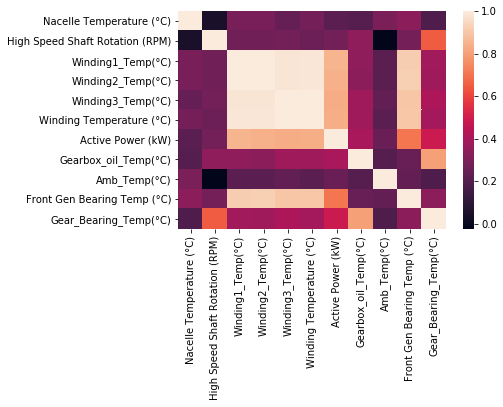

In [12]:
import seaborn as sns

sns.heatmap(df_sa.corr())

According to the heatmat, the front generator bearing is most correlated with winding temperature(0.9) and active power(0.7), while the gearbox bearing temperature is most correlated with gearbox oil temperature (0.8) and generator speed (0.65). According to the article, these are the most correlated parameters as well, while the other parameters are used in order to prevent overfitting.

Lets see how these data behaves in a mean analysis over the months to see if we can get some insights.

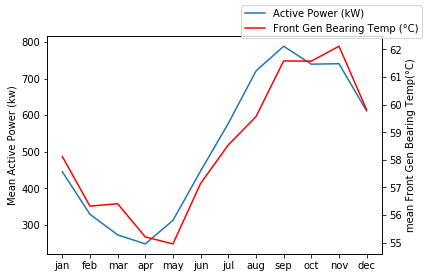

In [13]:
fig, ax = plt.subplots()

ax.plot(months, df_sa_month['Active Power (kW)'])
ax.set_ylabel("Mean Active Power (kw)")

ax2 = ax.twinx()

ax2.plot(months, df_sa_month['Front Gen Bearing Temp (°C)'], color='r')
ax2.set_ylabel('mean Front Gen Bearing Temp(°C)')

fig.legend()

plt.show()


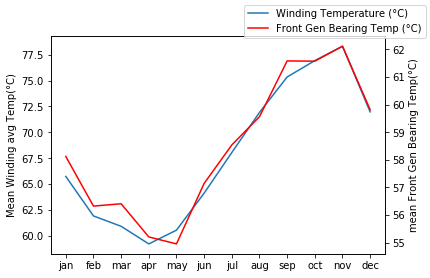

In [14]:
fig, ax = plt.subplots()

ax.plot(months, df_sa_month['Winding Temperature (°C)'])
ax.set_ylabel("Mean Winding avg Temp(°C)")

ax2 = ax.twinx()

ax2.plot(months, df_sa_month['Front Gen Bearing Temp (°C)'], color='r')
ax2.set_ylabel('mean Front Gen Bearing Temp(°C)')

fig.legend()

plt.show()

it is possible to see a clear relatinship between the monthy means. Now lets check it for the gearbox bearing correlates

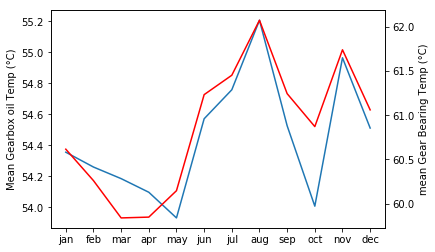

In [15]:
fig, ax = plt.subplots()

ax.plot(months, df_sa_month['Gearbox_oil_Temp(°C)'])
ax.set_ylabel("Mean Gearbox oil Temp (°C)")

ax2 = ax.twinx()

ax2.plot(months, df_sa_month['Gear_Bearing_Temp(°C)'], color='r')
ax2.set_ylabel('mean Gear Bearing Temp (°C)')

plt.show()


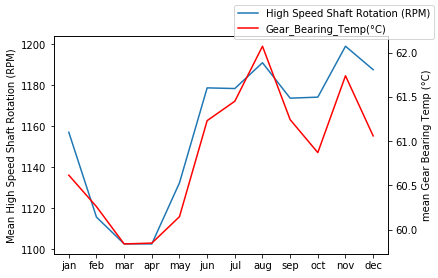

In [16]:
fig, ax = plt.subplots()

ax.plot(months, df_sa_month['High Speed Shaft Rotation (RPM)'])
ax.set_ylabel("Mean High Speed Shaft Rotation (RPM)")

ax2 = ax.twinx()

ax2.plot(months, df_sa_month['Gear_Bearing_Temp(°C)'], color='r')
ax2.set_ylabel('mean Gear Bearing Temp (°C)')

fig.legend()

plt.show()

## 3.3 Dividing data according to the article

In order to model the generator and gearbox bearing temperatures, the work presented by Schleichtingen e Santos (2011) used different data for each component, as shows the following table:

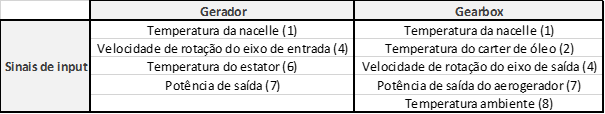

Therefore, data will be separated into gearbox and generator datasets to be analysed independently.

In [124]:
#gear_cols = ['Nacelle_Temp(°C)','Amb_Temp(°C)','Gearbox_oil_Temp(°C)',
#             'Generator_Spd(RPM)','Active_Power(kW)','Gear_Bearing_Temp(°C)']

gen_cols = ['Nacelle Temperature (°C)','Active Power (kW)',
            'High Speed Shaft Rotation (RPM)','Winding Temperature (°C)','Front Gen Bearing Temp (°C)']

In [125]:
#gear_df = df[gear_cols].copy()
#gear_df.info()

In [126]:
import pandas_profiling
#pandas_profiling.ProfileReport(gear_df)

In [127]:
gen_df = df[gen_cols].copy()
gen_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 450390 entries, 2011-01-01 00:00:00 to NaT
Data columns (total 5 columns):
Nacelle Temperature (°C)           321866 non-null float64
Active Power (kW)                  322141 non-null float64
High Speed Shaft Rotation (RPM)    322012 non-null float64
Winding Temperature (°C)           322148 non-null float64
Front Gen Bearing Temp (°C)        321993 non-null float64
dtypes: float64(5)
memory usage: 20.6 MB


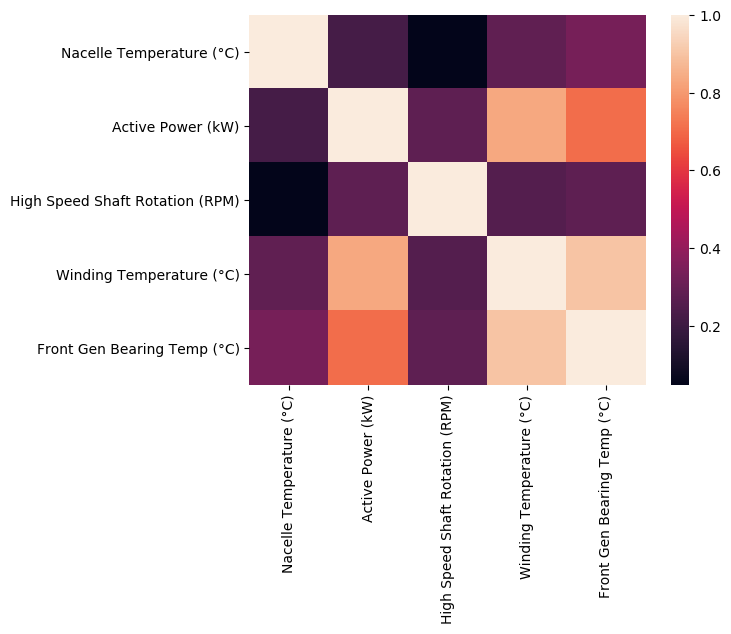

In [128]:
import seaborn as sns

plt.style.use('default')

sns.heatmap(gen_df.corr())

In [129]:
#pandas_profiling.ProfileReport(gen_df)

From the profile report of the datasets, one can see that in the missing values section, there are no huge gaps of missing that.

By seing the correlation analysis we found out that de Gearbox Oil Temperature is highly correlated with the Gearbox Bearing Temperature, what can affects our model. It is something that has to be analysed latter on.

Therefore, taking into account the method presented in Schleichtingen and Santos (2011) and this quick overview of data, the issues we are going to take care of for training our model are:

**1) Drop missing values;**

**2) Drop values under zero;**

**3) Drop outliers;**

**4) Test data with and without Gearbox oil temperature;**

## 3.4 Some more data interpretation graphs

### 3.4.1 For the gearbox

In [130]:
#import seaborn as sns

#sns.set(font_scale=3.0)
#plt.figure(figsize=(17, 15))
#sns.heatmap(gear_df.corr(),
#            annot=True, 
#            fmt=".2f",
#            cmap="RdBu_r",)

In [131]:
#sns.set(font_scale=1.0)
#sns.pairplot(gear_df, diag_kind='hist')

### 3.4.2 For the generator

In [132]:
import seaborn as sns

#sns.set(font_scale=3.0)
#plt.figure(figsize=(17, 15))
#sns.heatmap(gen_df.corr(), 
#            annot=True, 
#            fmt=".2f",
#            cmap="RdBu_r",)

In [133]:
#sns.set(font_scale=1)
#sns.pairplot(gen_df, diag_kind='hist')

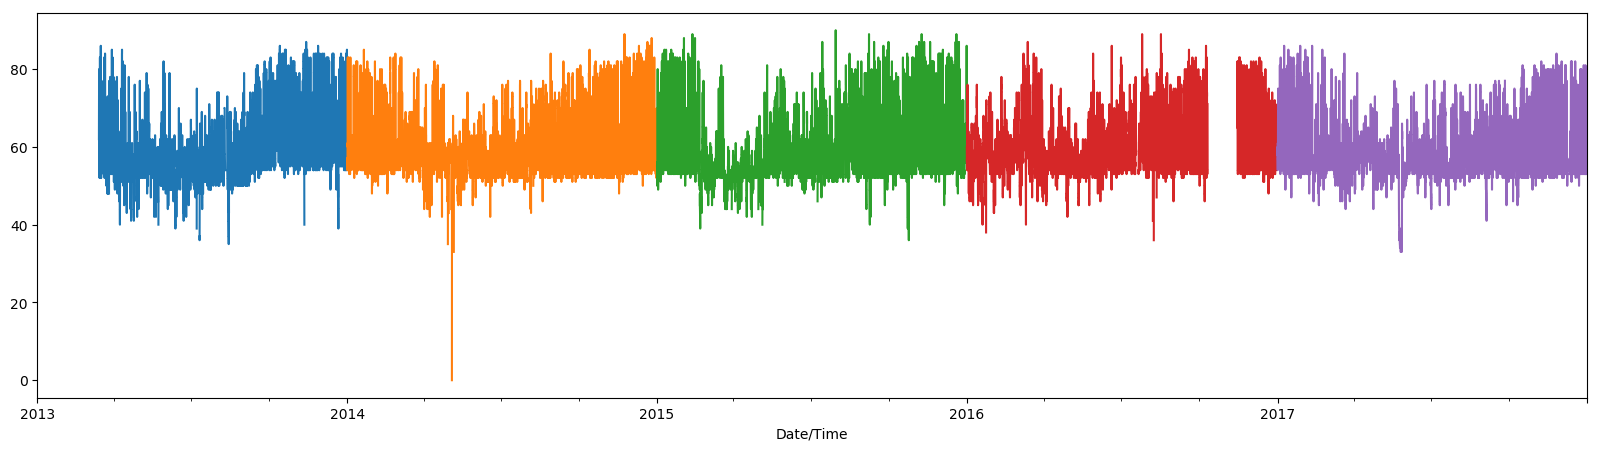

In [134]:
for i in range(2013, 2018):
    gen_df['Front Gen Bearing Temp (°C)'][gen_df.index.year == i].plot(figsize=(20,5))

## 4.0 Prepare data for machine learning

### 4.1 Dropping missing values for the whole dataset

In [135]:
# Dorping missing values for the Generator dataset

gen_df = gen_df.dropna()

gen_df.head()

,Nacelle Temperature (°C),Active Power (kW),High Speed Shaft Rotation (RPM),Winding Temperature (°C),Front Gen Bearing Temp (°C)
Date/Time,,,,,
2013-03-14 13:10:00,39.0,1119.9,1207.0,75.0,62.0
2013-03-14 13:20:00,39.0,1361.6,1210.0,77.0,63.0
2013-03-14 13:30:00,39.0,1348.6,1210.0,80.0,64.0
2013-03-14 13:40:00,39.0,1433.9,1211.0,83.0,65.0
2013-03-14 13:50:00,39.0,1538.7,1212.0,87.0,66.0


In [136]:
gen_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 321866 entries, 2013-03-14 13:10:00 to 2019-07-23 10:00:00
Data columns (total 5 columns):
Nacelle Temperature (°C)           321866 non-null float64
Active Power (kW)                  321866 non-null float64
High Speed Shaft Rotation (RPM)    321866 non-null float64
Winding Temperature (°C)           321866 non-null float64
Front Gen Bearing Temp (°C)        321866 non-null float64
dtypes: float64(5)
memory usage: 14.7 MB


The final training instances count for the generator dataset for 91 days would be in total 13104 instances. As there is 13045 instances, which represents 99,5%, we have got a pretty got training dataset when it comes for the number of training entries.

By taking a quick look at the train dataframes for each component, we see that the generator dataframe has more entries than the gearbox dataframe (around 10% more data entries).

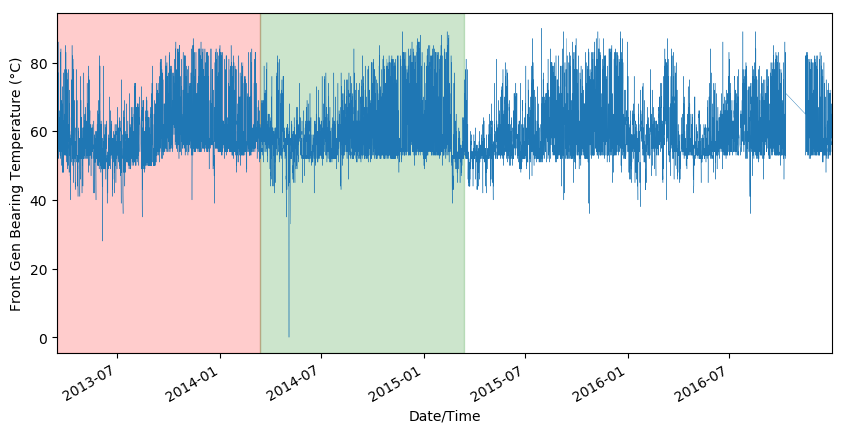

In [137]:
ax = gen_df['Front Gen Bearing Temp (°C)'][gen_df.index < '2017'].plot(figsize=(10,5), linewidth=0.3)
ax.set_ylabel("Front Gen Bearing Temperature (°C)")
ax.axvline('2017-05-26', ls='--', c='r', linewidth=1)
ax.axvspan('2013-03-14', '2014-03-14', color='red', alpha=0.2)
ax.axvspan('2014-03-14', '2015-03-14', color='g', alpha=0.2)

In [138]:
gen_df[gen_df.index < '2014-03-14'].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 51469 entries, 2013-03-14 13:10:00 to 2014-03-13 23:50:00
Data columns (total 5 columns):
Nacelle Temperature (°C)           51469 non-null float64
Active Power (kW)                  51469 non-null float64
High Speed Shaft Rotation (RPM)    51469 non-null float64
Winding Temperature (°C)           51469 non-null float64
Front Gen Bearing Temp (°C)        51469 non-null float64
dtypes: float64(5)
memory usage: 2.4 MB


In [139]:
gen_df[(gen_df.index > '2014-03-14') & (gen_df.index < '2015-03-14')].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 51830 entries, 2014-03-14 00:10:00 to 2015-03-13 23:50:00
Data columns (total 5 columns):
Nacelle Temperature (°C)           51830 non-null float64
Active Power (kW)                  51830 non-null float64
High Speed Shaft Rotation (RPM)    51830 non-null float64
Winding Temperature (°C)           51830 non-null float64
Front Gen Bearing Temp (°C)        51830 non-null float64
dtypes: float64(5)
memory usage: 2.4 MB


### 4.2.1 Cleaning negative numbers

In [140]:
# Defining a function that removes negative numbers out of the train datasets

def cleaning_neg_values(data_frame):
    for cols in data_frame.columns.tolist()[1:]:
        data_frame = data_frame.loc[data_frame[cols] >= 0]
    return data_frame

In [141]:
## For the generator

gen_df = cleaning_neg_values(gen_df)

gen_df.describe()

,Nacelle Temperature (°C),Active Power (kW),High Speed Shaft Rotation (RPM),Winding Temperature (°C),Front Gen Bearing Temp (°C)
count,295043.000000,295043.000000,295043.000000,295043.000000,295043.000000
mean,37.537010,572.621623,1200.714052,68.489820,59.373030
std,1.356583,454.133605,40.414978,15.554142,7.162067
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37.000000,199.300000,1201.000000,58.000000,54.000000
50%,37.000000,454.300000,1203.000000,62.000000,57.000000
75%,38.000000,852.500000,1206.000000,74.000000,62.000000
max,47.000000,1677.100000,1217.000000,209.000000,90.000000


### 4.2.2 Cleaning outliers

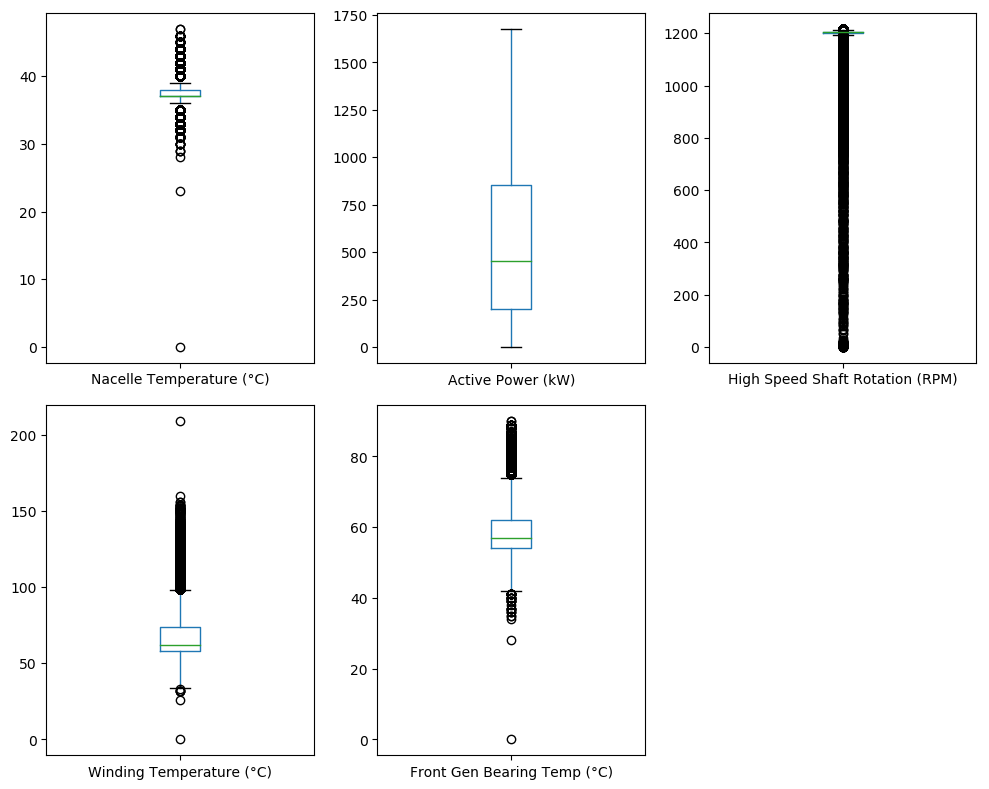

In [142]:
## For the generator

gen_cols = ['Nacelle Temperature (°C)','Active Power (kW)',
             'High Speed Shaft Rotation (RPM)','Winding Temperature (°C)', 'Front Gen Bearing Temp (°C)']

plt.style.use('default')

gen_df[gen_cols].plot(kind='box',
            subplots=True,
            layout=(2,3),
            figsize=(10,8),
            sharex=False)

plt.tight_layout()
plt.show()

In [143]:
#Function for outlier removing

def removing_outliers(data_frame, df_cols):
    for i in df_cols:
        q1, q3 = data_frame[i].quantile(0.25), data_frame[i].quantile(0.75)
        iqr = q3 - q1
        data_frame = data_frame.loc[data_frame[i] > q1 - 1.5*iqr]
        data_frame = data_frame.loc[data_frame[i] < q3 + 1.5*iqr]
    return data_frame

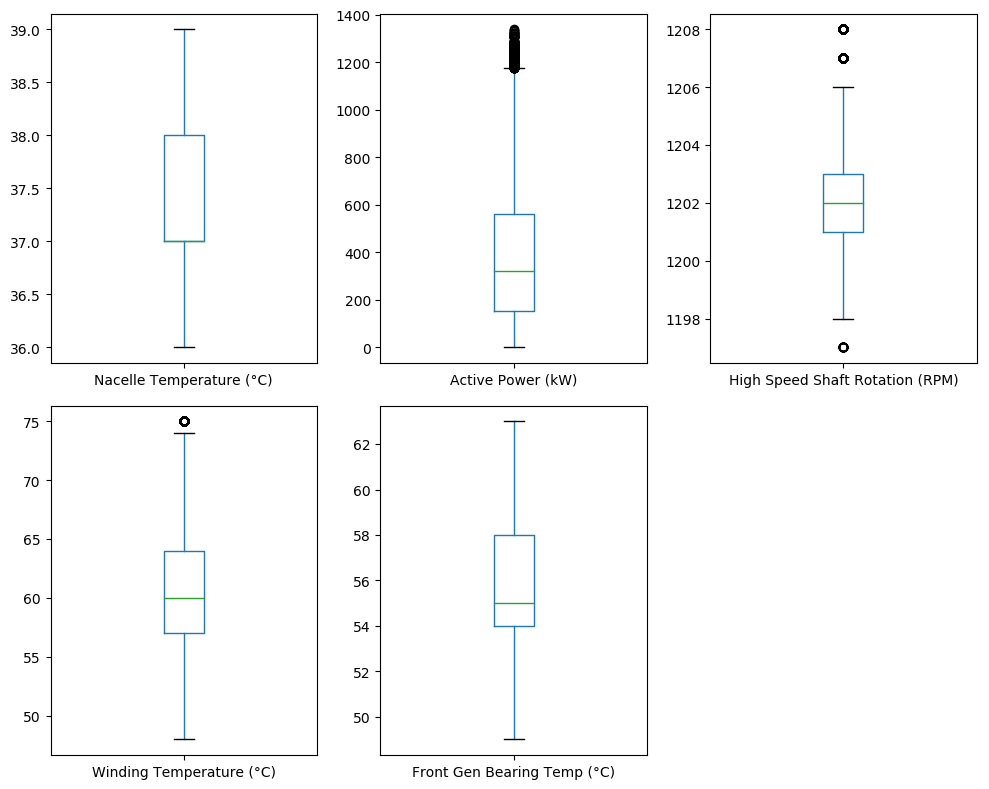

In [146]:
gen_df = removing_outliers(gen_df, gen_cols)

gen_df[gen_cols].plot(kind='box',
            subplots=True,
            layout=(2,3),
            figsize=(10,8),
            sharex=False)

plt.tight_layout()
plt.show()

In [147]:
gen_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 195667 entries, 2013-03-14 13:10:00 to 2019-07-23 10:00:00
Data columns (total 5 columns):
Nacelle Temperature (°C)           195667 non-null float64
Active Power (kW)                  195667 non-null float64
High Speed Shaft Rotation (RPM)    195667 non-null float64
Winding Temperature (°C)           195667 non-null float64
Front Gen Bearing Temp (°C)        195667 non-null float64
dtypes: float64(5)
memory usage: 9.0 MB


### 4.2.3 Investigating unexpected high gradients

In [148]:
import numpy as np

def percent_change(values):
    # Calculate the % change between the last value and the mean of previous values
    
    # Separate the last value and all pprevious values into variables
    previous_values = values[:-1]
    last_value = values[-1]
    
    # Calculate the % diff between the last value and the mean of earlier values
    percent_change = (last_value - np.mean(previous_values)) / np.mean(previous_values)
    return percent_change

In [149]:
def plot_perc_chg_tresh(raw_data, perc_chg_data):
    fig, axs = plt.subplots(1, 2, figsize=(12, 4))
    for data, ax in zip([raw_data, perc_chg_data], axs):
        # Calculate the mean / standard deviation for the data
        this_mean = data.mean()
        this_std = data.std()
    
        # Plot the data, with a window that is 3 standard deviations around the mean
        data.plot(ax=ax)
        ax.axhline(this_mean + this_std*3, ls='--', c='r')
        ax.axhline(this_mean - this_std*3, ls='--', c='r')
        ax.set_xticklabels(data.index, rotation=90) 

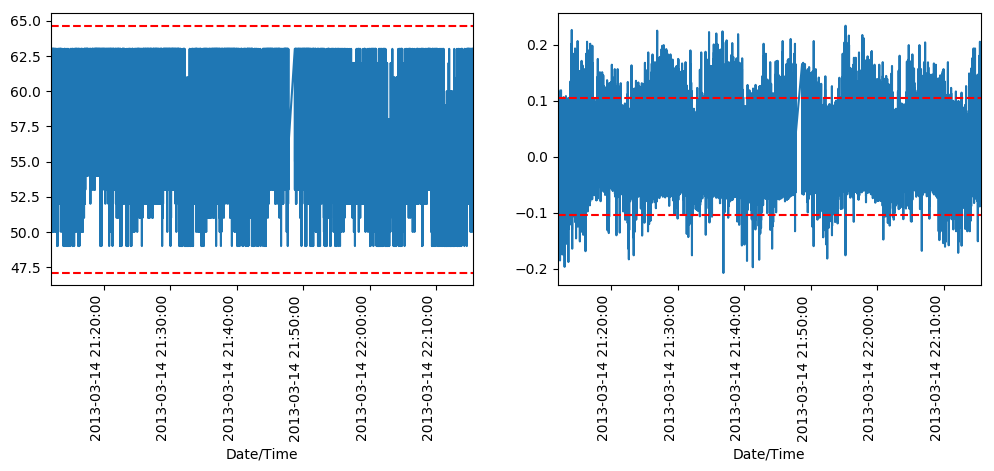

In [150]:
front_bearing_temp_perc_change = gen_df['Front Gen Bearing Temp (°C)'].rolling(window=20).aggregate(percent_change)
plot_perc_chg_tresh(gen_df['Front Gen Bearing Temp (°C)'], front_bearing_temp_perc_change)

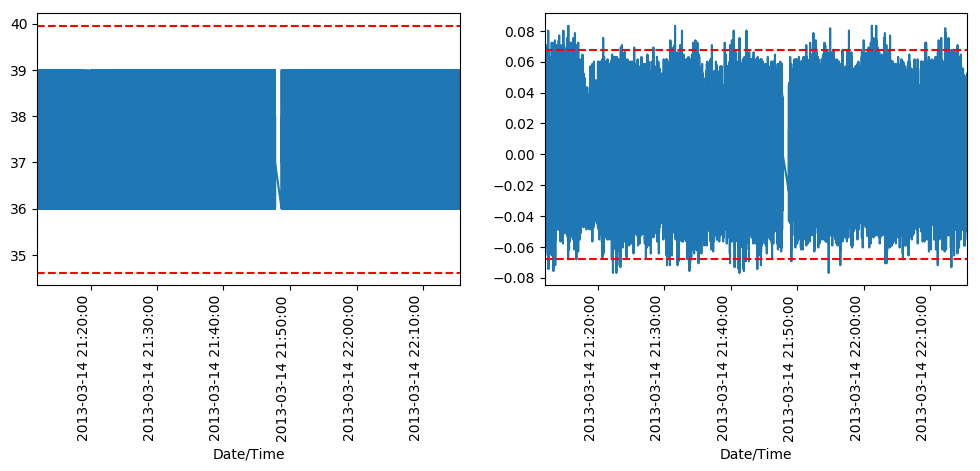

In [151]:
nacelle_perc_change = gen_df['Nacelle Temperature (°C)'].rolling(window=20).aggregate(percent_change)
plot_perc_chg_tresh(gen_df['Nacelle Temperature (°C)'], nacelle_perc_change)

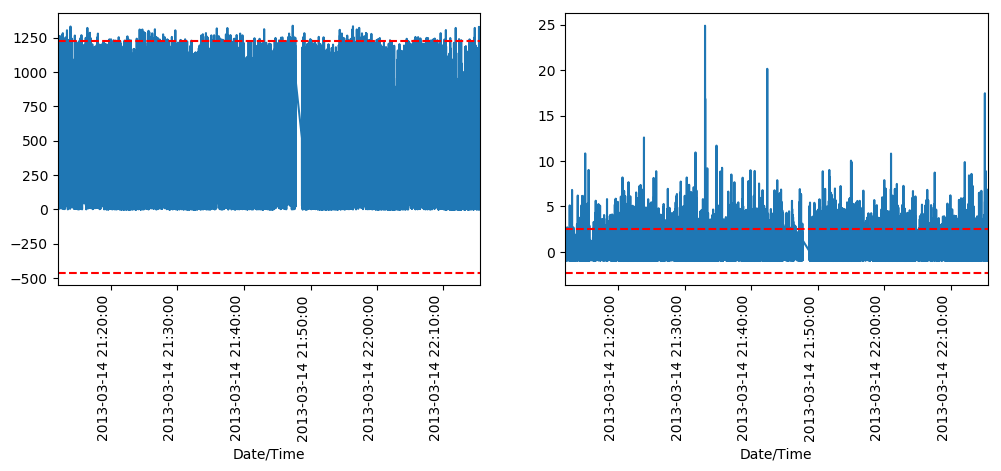

In [152]:
active_power_change = gen_df['Active Power (kW)'].rolling(window=20).aggregate(percent_change)
plot_perc_chg_tresh(gen_df['Active Power (kW)'], active_power_change)

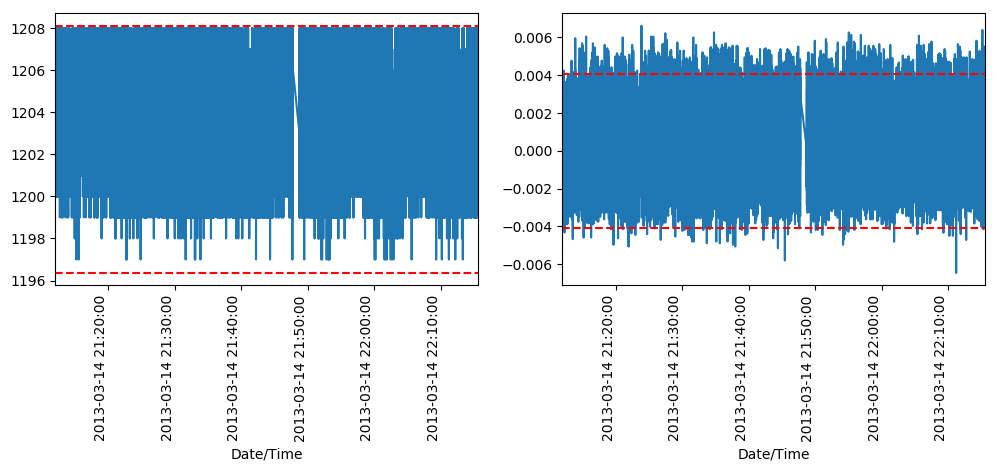

In [153]:
gen_spd_change = gen_df['High Speed Shaft Rotation (RPM)'].rolling(window=20).aggregate(percent_change)
plot_perc_chg_tresh(gen_df['High Speed Shaft Rotation (RPM)'], gen_spd_change)

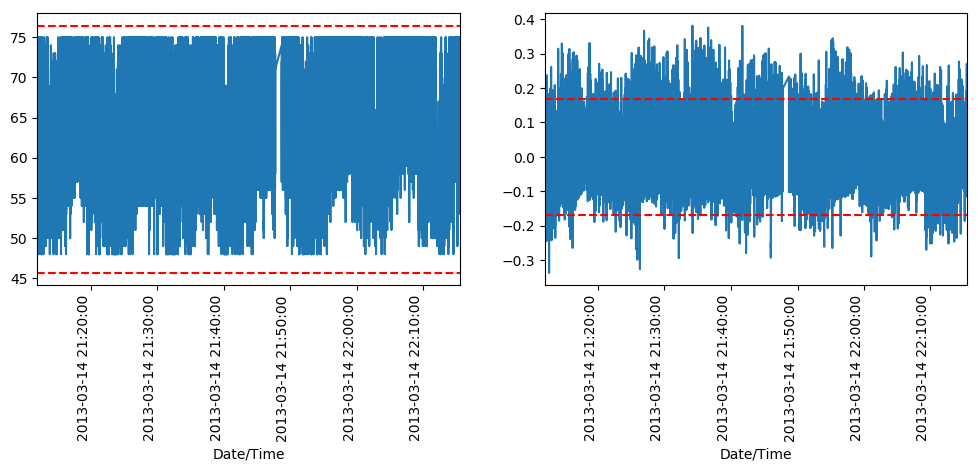

In [154]:
wind_temp_change = gen_df['Winding Temperature (°C)'].rolling(window=20).aggregate(percent_change)
plot_perc_chg_tresh(gen_df['Winding Temperature (°C)'], wind_temp_change)

From this grafs we can see that some data has changed too much compared to its standard deviation. Lets build a function that replace this values for the mean.

In [155]:
# Function for high gradient outliers replacement

gen_cols = ['Nacelle Temperature (°C)','Active Power (kW)',
             'High Speed Shaft Rotation (RPM)','Winding Temperature (°C)', 'Front Gen Bearing Temp (°C)']

def removing_perc_change_outliers(data_frame, df_cols):
    col_perc_chg = data_frame[df_cols].rolling(window=20).aggregate(percent_change)
    for i in df_cols:
        this_mean = col_perc_chg[i].mean()
        this_std = col_perc_chg[i].std()
        
        data_frame = data_frame.loc[col_perc_chg[i] < this_mean + 3*this_std]
        data_frame = data_frame.loc[col_perc_chg[i] > this_mean - 3*this_std]
    return data_frame

In [156]:
gen_df = removing_perc_change_outliers(gen_df, gen_cols)

In [157]:
gen_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 186868 entries, 2013-03-15 09:10:00 to 2019-07-23 10:00:00
Data columns (total 5 columns):
Nacelle Temperature (°C)           186868 non-null float64
Active Power (kW)                  186868 non-null float64
High Speed Shaft Rotation (RPM)    186868 non-null float64
Winding Temperature (°C)           186868 non-null float64
Front Gen Bearing Temp (°C)        186868 non-null float64
dtypes: float64(5)
memory usage: 8.6 MB


### 4.2.3 Data Scaling

The method of Scheleichtingen and Santos (2011) scale the data using the following equation:

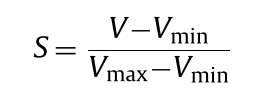

Where V is a variable and S is the normalized variable.

In [158]:
# Defining a data scaling function:

def data_scaling(data_frame, df_cols, base_df):
    for j in df_cols:
        a = base_df[j].max()
        b = base_df[j].min()
        data_frame[j] = (data_frame[j]-b)/(a-b)
    return data_frame

In [159]:
#Scaling generator data

gen_cols = ['Nacelle Temperature (°C)','Active Power (kW)',
             'High Speed Shaft Rotation (RPM)','Winding Temperature (°C)']

gen_df = data_scaling(gen_df, gen_cols, gen_df)

gen_df.describe()

,Nacelle Temperature (°C),Active Power (kW),High Speed Shaft Rotation (RPM),Winding Temperature (°C),Front Gen Bearing Temp (°C)
count,186868.000000,186868.000000,186868.000000,186868.000000,186868.000000
mean,0.431699,0.283409,0.468153,0.478238,55.818021
std,0.295294,0.208023,0.171556,0.182674,2.844177
min,0.000000,0.000000,0.000000,0.000000,49.000000
25%,0.333333,0.113069,0.363636,0.333333,54.000000
50%,0.333333,0.237964,0.454545,0.444444,55.000000
75%,0.666667,0.415732,0.545455,0.592593,58.000000
max,1.000000,1.000000,1.000000,1.000000,63.000000


In [160]:
gen_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 186868 entries, 2013-03-15 09:10:00 to 2019-07-23 10:00:00
Data columns (total 5 columns):
Nacelle Temperature (°C)           186868 non-null float64
Active Power (kW)                  186868 non-null float64
High Speed Shaft Rotation (RPM)    186868 non-null float64
Winding Temperature (°C)           186868 non-null float64
Front Gen Bearing Temp (°C)        186868 non-null float64
dtypes: float64(5)
memory usage: 8.6 MB


### 4.2 Creating train and test datasets

In Schleichtingen and Santos (2011), three months of data was used for training the neural network. The data considered for training was to be taken from the period from when the Wind Turbine is certanly working healthy, in order to build an accurate normal behaviour model. Therefore, the data used for training the model will be taken from the beggining of operation until 3 months of operation.

By seing that the operation of this Wind Turbine started in 2013-03-14, it is assumed that it will complete 3 months operation in 2014-06-15, therefore, it will be the endpoint of data for training.

In [161]:
# train data for the generator

date_training_start = '2013'
date_training_end = '2014-03-14'

gen_df_train = gen_df[(gen_df.index > date_training_start) & (gen_df.index < date_training_end)].copy()
gen_df_train.tail()

,Nacelle Temperature (°C),Active Power (kW),High Speed Shaft Rotation (RPM),Winding Temperature (°C),Front Gen Bearing Temp (°C)
Date/Time,,,,,
2014-03-13 22:50:00,0.666667,0.044022,0.272727,0.296296,55.0
2014-03-13 23:00:00,0.666667,0.028000,0.272727,0.296296,54.0
2014-03-13 23:10:00,0.666667,0.016938,0.272727,0.296296,54.0
2014-03-13 23:20:00,0.666667,0.009918,0.272727,0.296296,54.0
2014-03-13 23:30:00,0.666667,0.016098,0.272727,0.296296,54.0


In [162]:
# Validation data for de generator

date_validation_start = '2014-04-14'
date_validation_end = '2015-04-15'

gen_df_validation = gen_df[(gen_df.index > date_validation_start) & (gen_df.index < date_validation_end)].copy()
gen_df_validation.head()

,Nacelle Temperature (°C),Active Power (kW),High Speed Shaft Rotation (RPM),Winding Temperature (°C),Front Gen Bearing Temp (°C)
Date/Time,,,,,
2014-04-14 00:10:00,0.333333,0.070726,0.272727,0.407407,60.0
2014-04-14 00:20:00,0.333333,0.085069,0.272727,0.407407,60.0
2014-04-14 00:30:00,0.333333,0.120546,0.363636,0.370370,59.0
2014-04-14 00:40:00,0.333333,0.116121,0.363636,0.370370,59.0
2014-04-14 00:50:00,0.333333,0.101625,0.363636,0.370370,60.0


In [163]:
gen_df_train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 23201 entries, 2013-03-15 09:10:00 to 2014-03-13 23:30:00
Data columns (total 5 columns):
Nacelle Temperature (°C)           23201 non-null float64
Active Power (kW)                  23201 non-null float64
High Speed Shaft Rotation (RPM)    23201 non-null float64
Winding Temperature (°C)           23201 non-null float64
Front Gen Bearing Temp (°C)        23201 non-null float64
dtypes: float64(5)
memory usage: 1.1 MB


In [165]:
gen_df_validation.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 31554 entries, 2014-04-14 00:10:00 to 2015-04-14 23:50:00
Data columns (total 5 columns):
Nacelle Temperature (°C)           31554 non-null float64
Active Power (kW)                  31554 non-null float64
High Speed Shaft Rotation (RPM)    31554 non-null float64
Winding Temperature (°C)           31554 non-null float64
Front Gen Bearing Temp (°C)        31554 non-null float64
dtypes: float64(5)
memory usage: 1.4 MB


### Defining a function that converts the series to supervised learning data

In [166]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

In [167]:
train_reframed = series_to_supervised(gen_df_train, 1, 1)

train_reframed.head()

,var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var1(t),var2(t),var3(t),var4(t),var5(t)
Date/Time,,,,,,,,,,
2013-03-15 09:20:00,0.333333,0.486534,0.636364,0.481481,55.0,0.333333,0.338674,0.454545,0.481481,56.0
2013-03-15 09:30:00,0.333333,0.338674,0.454545,0.481481,56.0,0.666667,0.513237,0.636364,0.481481,56.0
2013-03-15 09:40:00,0.666667,0.513237,0.636364,0.481481,56.0,0.666667,0.307393,0.454545,0.518519,56.0
2013-03-15 10:00:00,0.666667,0.307393,0.454545,0.518519,56.0,1.000000,0.593805,0.636364,0.555556,57.0
2013-03-15 10:10:00,1.000000,0.593805,0.636364,0.555556,57.0,1.000000,0.505074,0.636364,0.592593,57.0


In [168]:
valid_reframed = series_to_supervised(gen_df_validation, 1, 1)

## 5.0 Schleichtingen and Santos (2011) model. 

The model proposed by Schlechtingen e Santos (2011) is a feedforward neural network with 5 neurons in the hidden layer, as shows the figure:

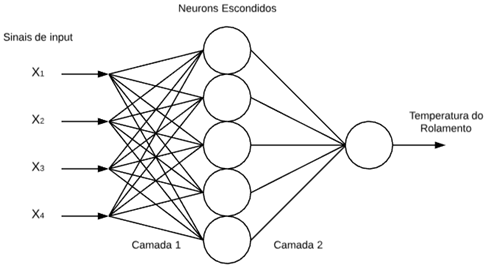

- The input signals are the ones shown in the section 3.3, and the output would be the bearing temperatures for each component.
- The activation function is the Sigmoid Function.
- The Trainging method will be: Gradient Descent with momentum.
- The weights are inicialized radonmly.

### 5.1 For the generator bearing

In [169]:
# Defining features and targets

import numpy as np

entry_variables = ['var1(t-1)','var2(t-1)','var3(t-1)','var4(t-1)']

np.random.seed(123)

X = np.array(train_reframed[entry_variables]).copy()
y = np.array(train_reframed['var5(t)'].copy())
valid_X = np.array(valid_reframed[entry_variables]).copy()
valid_y = np.array(valid_reframed['var5(t)'].copy())

In [170]:
# Importing Keras

from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras import optimizers, initializers
from keras.wrappers.scikit_learn import KerasRegressor

Using TensorFlow backend.


In [693]:
estimator = Sequential()
estimator.add(Dense(7, input_shape = (4,), activation = 'sigmoid',
                   bias_initializer='zeros', kernel_initializer=initializers.RandomNormal(mean=0.0, stddev=0.005, seed=123)))
estimator.add(Dense(1))
estimator.compile(loss='mse', optimizer = optimizers.SGD(lr=0.001, decay=1e-6, momentum=0.9, nesterov=True))
estimator.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_63 (Dense)             (None, 7)                 35        
_________________________________________________________________
dense_64 (Dense)             (None, 1)                 8         
Total params: 43
Trainable params: 43
Non-trainable params: 0
_________________________________________________________________


In [694]:
estimator.fit(X, y, epochs = 100, batch_size = 31)

Epoch 1/100
23200/23200 [==============================] - 2s 69us/step - loss: 51.9164
Epoch 2/100
23200/23200 [==============================] - 1s 29us/step - loss: 4.9470
Epoch 3/100
23200/23200 [==============================] - 1s 32us/step - loss: 3.8174
Epoch 4/100
23200/23200 [==============================] - 1s 28us/step - loss: 3.4793
Epoch 5/100
23200/23200 [==============================] - 1s 32us/step - loss: 3.4135
Epoch 6/100
23200/23200 [==============================] - 1s 49us/step - loss: 3.3928
Epoch 7/100
23200/23200 [==============================] - 1s 30us/step - loss: 3.3802
Epoch 8/100
23200/23200 [==============================] - 1s 30us/step - loss: 3.3721
Epoch 9/100
23200/23200 [==============================] - 1s 31us/step - loss: 3.3672
Epoch 10/100
23200/23200 [==============================] - 1s 31us/step - loss: 3.3608
Epoch 11/100
23200/23200 [==============================] - 1s 30us/step - loss: 3.3575
Epoch 12/100
23200/23200 [==============

23200/23200 [==============================] - 1s 44us/step - loss: 3.2180
Epoch 94/100
23200/23200 [==============================] - 1s 35us/step - loss: 3.2174
Epoch 95/100
23200/23200 [==============================] - 1s 47us/step - loss: 3.2161
Epoch 96/100
23200/23200 [==============================] - 1s 37us/step - loss: 3.2144
Epoch 97/100
23200/23200 [==============================] - 1s 31us/step - loss: 3.2188
Epoch 98/100
23200/23200 [==============================] - 1s 30us/step - loss: 3.2143
Epoch 99/100
23200/23200 [==============================] - 1s 29us/step - loss: 3.2096
Epoch 100/100
23200/23200 [==============================] - 1s 28us/step - loss: 3.2132


#### 5.1.1 Trainging the Neural Network with validation data

In [792]:
# Previsão escalonada

pred_test_gen = estimator.predict(valid_X).reshape(-1, 1)

print(pred_test_gen)

[[56.84806 ]
 [56.81761 ]
 [56.32264 ]
 ...
 [54.619205]
 [55.155663]
 [54.24799 ]]


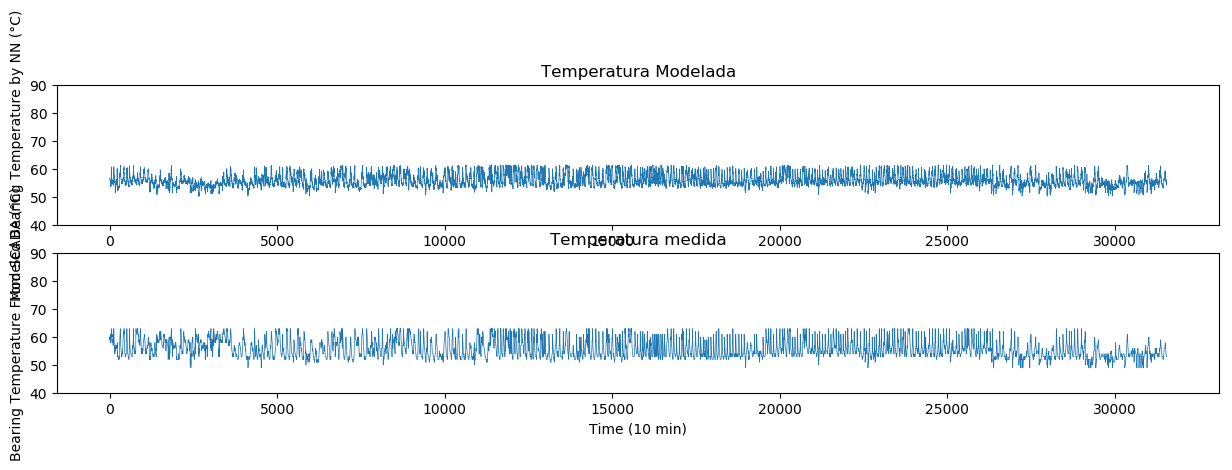

In [793]:
# Gráfico relacionando a temperatura medida e a temperatura modelada
z = np.arange(1, len(pred_test_gen)+1, 1)
y_pred = pred_test_gen
y_real = np.array(valid_y)

fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(15,4))

ax0 = ax[0].plot(z, y_pred, linewidth=0.5)
ax[0].set_title('Temperatura Modelada')
ax[0].set_xlabel('Time (10 min)')
ax[0].set_ylabel('Modeled Bearing Temperature by NN (°C)')
ax[0].set_ylim([40, 90])

ax1 = ax[1].plot(z, y_real, linewidth=0.5)
ax[1].set_title('Temperatura medida')
ax[1].set_xlabel('Time (10 min)')
ax[1].set_ylabel('Bearing Temperature From SCADA (°C)')
ax[1].set_ylim([40, 90])
plt.show()


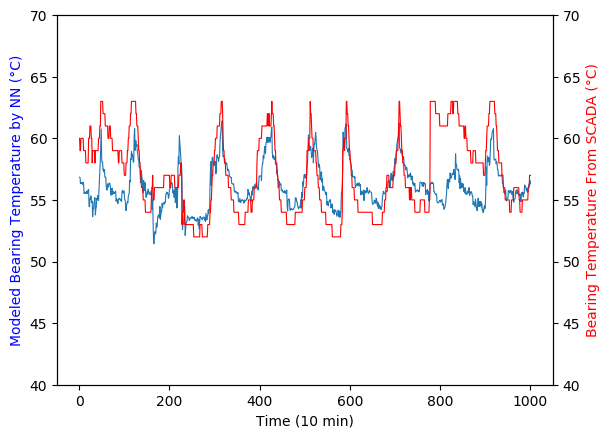

In [794]:
z = np.arange(1, 1001, 1)

fig, ax = plt.subplots()

ax.plot(z, y_pred[0:1000], linewidth=0.8)
ax.set_ylabel('Modeled Bearing Temperature by NN (°C)', color='b')
ax.set_ylim([40, 70])

ax2 = ax.twinx()

ax2.plot(z, y_real[0:1000], color='r', linewidth=0.8)
ax2.set_ylabel('Bearing Temperature From SCADA (°C)', color='r')
ax2.set_ylim([40, 70])

ax.set_xlabel('Time (10 min)')


plt.show()


In [795]:
error = y_real.reshape(-1, 1) - y_pred
print(error.std())

2.0470294269668194


In [796]:
from sklearn.metrics import max_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

print(mean_squared_error(y_real, y_pred))
print(mean_absolute_error(y_real, y_pred))
print(max_error(y_real, y_pred))

4.352608636261578
1.6787265817121564
10.237655639648438


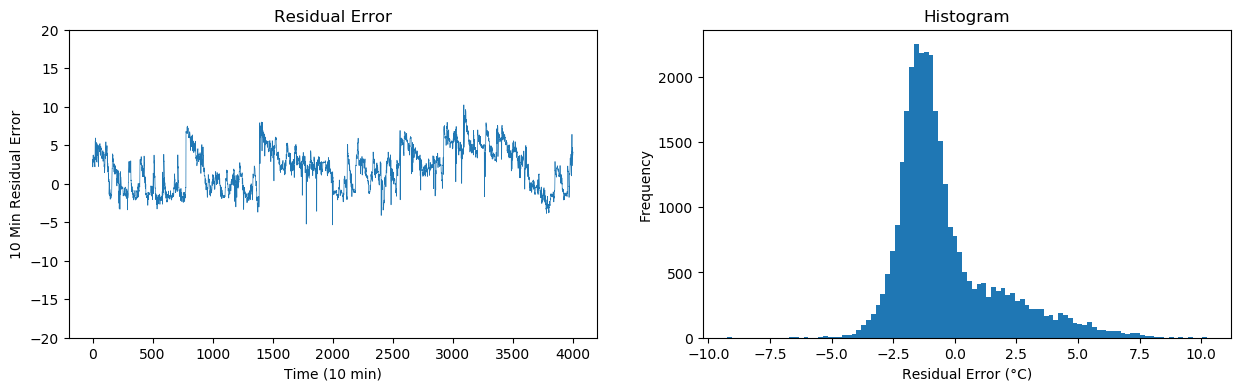

In [797]:
z = np.arange(1, 4001, 1)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,4))

ax0 = ax[0].plot(z, error[0:4000], linewidth=0.5)
ax[0].set_title('Residual Error')
ax[0].set_xlabel('Time (10 min)')
ax[0].set_ylabel('10 Min Residual Error')
ax[0].set_ylim([-20, 20])

ax1 = ax[1].hist(error, bins=100)
ax[1].set_title('Histogram')
ax[1].set_xlabel('Residual Error (°C)')
ax[1].set_ylabel('Frequency')
plt.show()
#plt.ylim(0, 100)

##### 5.1.2.1 Residual Hour Batches

In [798]:
def hour_batches_mean(data):
    how_many = len(data)//6
    error_batches = np.ones((how_many, 1))
    for i in range(how_many):
        for j in range(6):
            error_batches[i] += data[6*i + j]
            
            
        error_batches[i] = error_batches[i]/6
    return error_batches

In [799]:
hour_error_batch = hour_batches_mean(error)

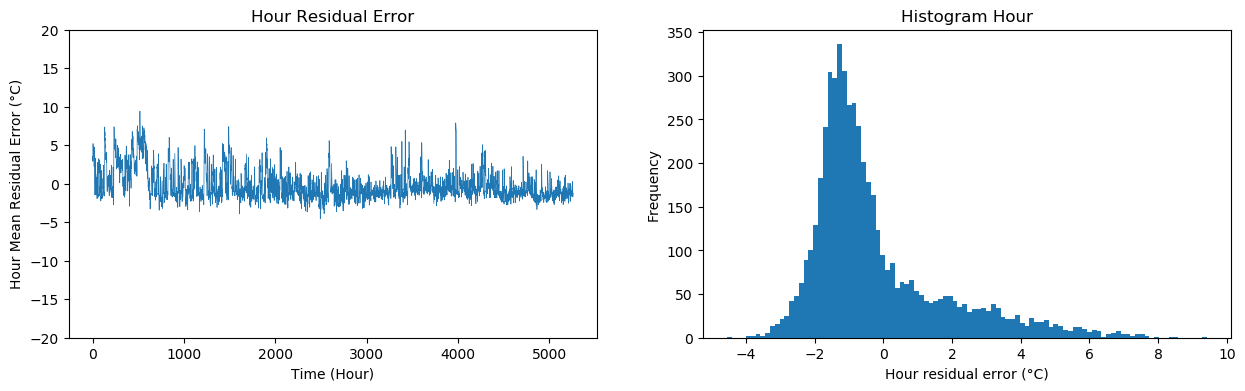

In [800]:
z = z = np.arange(1, len(hour_error_batch)+1, 1)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,4))

ax0 = ax[0].plot(z, hour_error_batch[0:len(hour_error_batch)], linewidth=0.5)
ax[0].set_title('Hour Residual Error')
ax[0].set_xlabel('Time (Hour)')
ax[0].set_ylabel('Hour Mean Residual Error (°C)')
ax[0].set_ylim([-20, 20])

ax1 = ax[1].hist(hour_error_batch, bins=100)
ax[1].set_title('Histogram Hour')
ax[1].set_xlabel('Hour residual error (°C)')
ax[1].set_ylabel('Frequency')

plt.show()

##### 5.1.2.2 Residaul Daily Batches

In [801]:
def daily_batches_mean(data):
    how_many = len(data)//144
    error_batches = np.ones((how_many, 1))
    for i in range(how_many):
        for j in range(144):
            error_batches[i] += data[144*i + j]
            
            
        error_batches[i] = error_batches[i]/144
    return error_batches

In [802]:
daily_error_batch = daily_batches_mean(error)

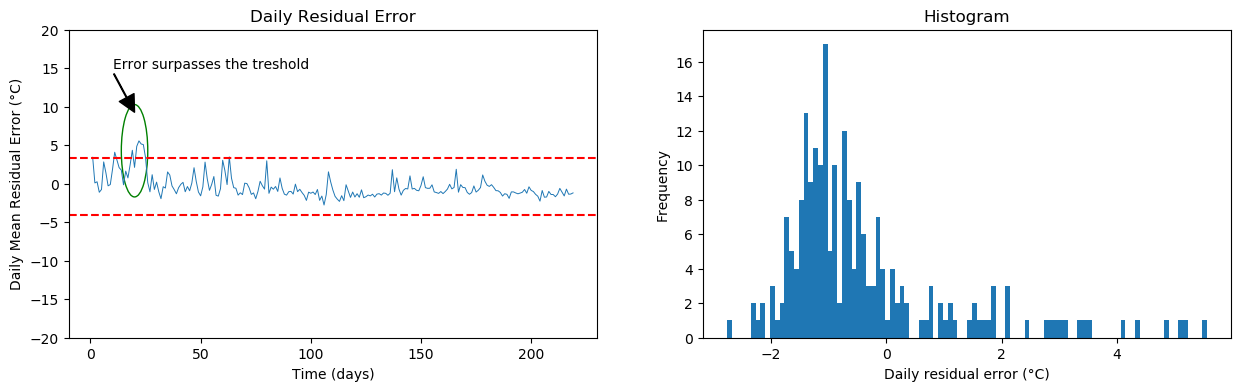

In [856]:
import matplotlib.patches as patches

z = z = np.arange(1, len(daily_error_batch)+1, 1)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,4))

this_mean = daily_error_batch.mean()
this_std = daily_error_batch.std()

ax0 = ax[0].plot(z, daily_error_batch[0:len(daily_error_batch)], linewidth=0.7)
ax[0].set_title('Daily Residual Error')
ax[0].set_xlabel('Time (days)')
ax[0].set_ylabel('Daily Mean Residual Error (°C)')
ax[0].axhline(this_mean + this_std*2.5, ls='--', c='r')
ax[0].axhline(this_mean - this_std*2.5, ls='--', c='r')
ax[0].set_ylim([-20, 20])
circle2 = plt.Circle((20, this_mean + this_std*2.5+1), 6, color='g', fill=False)
ax[0].add_artist(circle2)
ax[0].annotate('Error surpasses the treshold', xy=(20, this_mean + this_std*2.5+6), xytext=(10, 15),
            arrowprops=dict(facecolor='black', width = 0.5)
            )

ax1 = ax[1].hist(daily_error_batch, bins=100)
ax[1].set_title('Histogram')
ax[1].set_xlabel('Daily residual error (°C)')
ax[1].set_ylabel('Frequency')


plt.show()

### 5.1.3 Testing in the Failure Period

The Failure in this wind turbine bearing occured in 2017, therefore we are taking data from 2016 to 2018 in order to evaluate if it can identify faults.

In [901]:
# Defining test data

date_testing_start = '2016-05-26'

date_testing_end = '2018-05-26'

# Test data for the generator front bearing

gen_df_test_f = gen_df[gen_df.index > date_testing_start].copy()
gen_df_test_f = gen_df_test_f[gen_df_test_f.index < date_testing_end].copy()

gen_df_test_f.tail()

,Nacelle Temperature (°C),Active Power (kW),High Speed Shaft Rotation (RPM),Winding Temperature (°C),Front Gen Bearing Temp (°C)
Date/Time,,,,,
2018-05-25 22:50:00,0.666667,0.034867,0.272727,0.370370,55.0
2018-05-25 23:00:00,0.000000,0.059892,0.363636,0.407407,55.0
2018-05-25 23:10:00,1.000000,0.059129,0.272727,0.407407,55.0
2018-05-25 23:20:00,0.000000,0.048676,0.272727,0.407407,54.0
2018-05-25 23:30:00,0.666667,0.025254,0.363636,0.407407,54.0


In [902]:
gen_df_test_f.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 58325 entries, 2016-05-26 00:10:00 to 2018-05-25 23:30:00
Data columns (total 5 columns):
Nacelle Temperature (°C)           58325 non-null float64
Active Power (kW)                  58325 non-null float64
High Speed Shaft Rotation (RPM)    58325 non-null float64
Winding Temperature (°C)           58325 non-null float64
Front Gen Bearing Temp (°C)        58325 non-null float64
dtypes: float64(5)
memory usage: 2.7 MB


In [903]:
test_f_reframed = series_to_supervised(gen_df_test_f, 2, 1)
test_f_reframed.head()

,var1(t-2),var2(t-2),var3(t-2),var4(t-2),var5(t-2),var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var1(t),var2(t),var3(t),var4(t),var5(t)
Date/Time,,,,,,,,,,,,,,,
2016-05-26 00:30:00,0.333333,0.373541,0.545455,0.629630,61.0,0.333333,0.381170,0.545455,0.629630,61.0,0.333333,0.439841,0.545455,0.592593,60.0
2016-05-26 00:40:00,0.333333,0.381170,0.545455,0.629630,61.0,0.333333,0.439841,0.545455,0.592593,60.0,0.333333,0.486000,0.636364,0.629630,59.0
2016-05-26 00:50:00,0.333333,0.439841,0.545455,0.592593,60.0,0.333333,0.486000,0.636364,0.629630,59.0,0.333333,0.361181,0.545455,0.592593,59.0
2016-05-26 01:00:00,0.333333,0.486000,0.636364,0.629630,59.0,0.333333,0.361181,0.545455,0.592593,59.0,0.333333,0.446708,0.545455,0.592593,59.0
2016-05-26 01:10:00,0.333333,0.361181,0.545455,0.592593,59.0,0.333333,0.446708,0.545455,0.592593,59.0,0.333333,0.451057,0.636364,0.592593,58.0


In [904]:
X_test_gen_f = np.array(test_f_reframed[entry_variables].copy())
y_test_gen_f = np.array(test_f_reframed['var5(t)'].copy())

In [905]:
# Making predictions

pred_test_gen = estimator.predict(X_test_gen_f).reshape(-1, 1)

print(pred_test_gen)

[[59.480217]
 [58.9312  ]
 [59.32772 ]
 ...
 [56.99778 ]
 [56.08908 ]
 [56.873646]]


In [906]:
# Trying to find the failure point

gen_df_fail = pd.DataFrame(pred_test_gen, index = test_f_reframed.index)

gen_df_fail.head()

,0
Date/Time,
2016-05-26 00:30:00,59.480217
2016-05-26 00:40:00,58.931198
2016-05-26 00:50:00,59.327721
2016-05-26 01:00:00,59.144661
2016-05-26 01:10:00,58.909531


In [927]:
print(gen_df_fail[(gen_df_fail.index > '2017-05-23') & (gen_df_fail.index < '2017-05-25')])

                             0
Date/Time                     
2017-05-23 00:10:00  56.760544
2017-05-23 00:20:00  56.568565
2017-05-23 00:30:00  56.941917
2017-05-23 00:40:00  56.854107
2017-05-23 00:50:00  56.862934
...                        ...
2017-05-23 18:20:00  59.718216
2017-05-23 18:30:00  59.512856
2017-05-23 18:40:00  59.542549
2017-05-23 18:50:00  59.107796
2017-05-23 19:00:00  58.815273

[112 rows x 1 columns]


In [935]:
gen_df_fail_f = gen_df_fail[gen_df_fail.index < '2017-05-24']

print(gen_df_fail_f.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 27385 entries, 2016-05-26 00:30:00 to 2017-05-23 19:00:00
Data columns (total 1 columns):
0    27385 non-null float32
dtypes: float32(1)
memory usage: 320.9 KB
None


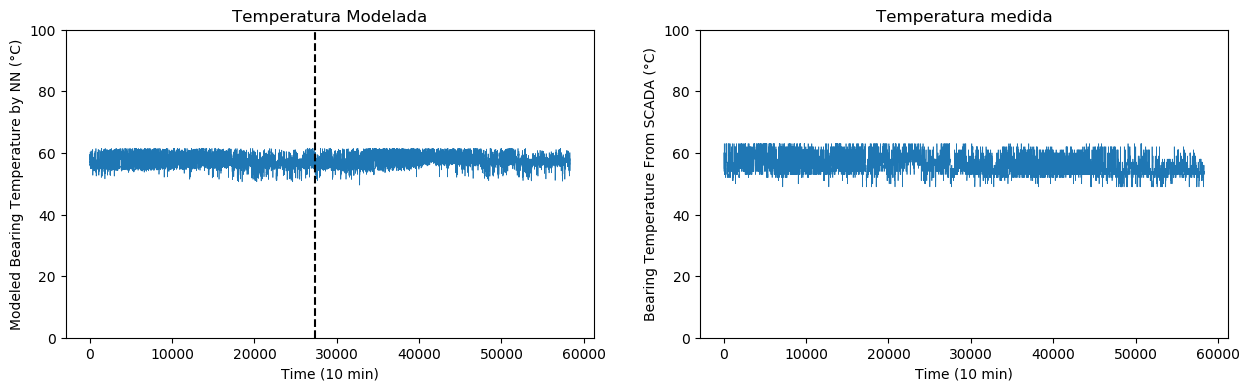

In [946]:
# Gráfico relacionando a temperatura medida e a temperatura modelada
z = np.arange(1, len(pred_test_gen)+1, 1)
y_pred = pred_test_gen
y_real = np.array(y_test_gen_f)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,4))

ax0 = ax[0].plot(z, y_pred, linewidth=0.5)
ax[0].set_title('Temperatura Modelada')
ax[0].set_xlabel('Time (10 min)')
ax[0].set_ylabel('Modeled Bearing Temperature by NN (°C)')
ax[0].set_ylim([0, 100])
ax[0].axvline(27385, ls='--', c='black')

ax1 = ax[1].plot(z, y_real, linewidth=0.5)
ax[1].set_title('Temperatura medida')
ax[1].set_xlabel('Time (10 min)')
ax[1].set_ylabel('Bearing Temperature From SCADA (°C)')
ax[1].set_ylim([0, 100])
plt.show()

In [891]:
error = y_real.reshape(-1, 1) - y_pred
error

array([[ 0.51978302],
       [ 0.06880188],
       [-0.32772064],
       ...,
       [-1.99777985],
       [-2.08908081],
       [-2.87364578]])

In [892]:
from sklearn.metrics import max_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

print(mean_squared_error(y_real, y_pred))
print(mean_absolute_error(y_real, y_pred))
print(max_error(y_real, y_pred))

7.669402822271068
2.4338756584367753
11.265243530273438


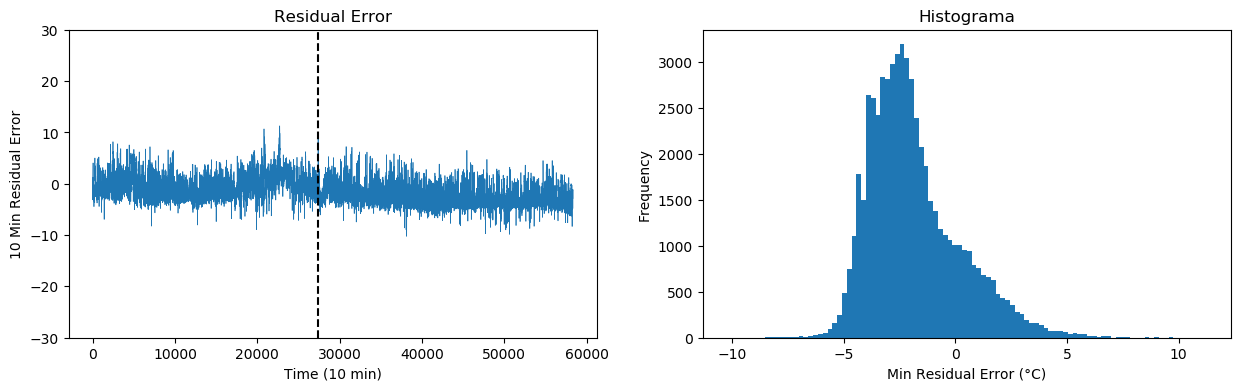

In [945]:
z = np.arange(1, len(error)+1, 1)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,4))

ax0 = ax[0].plot(z, error, linewidth=0.5)
ax[0].set_title('Residual Error')
ax[0].set_xlabel('Time (10 min)')
ax[0].set_ylabel('10 Min Residual Error')
ax[0].set_ylim([-30, 30])
ax[0].axvline(27385, ls='--', c='black')

ax1 = ax[1].hist(error, bins=100)
ax[1].set_title('Histograma')
ax[1].set_xlabel('Min Residual Error (°C)')
ax[1].set_ylabel('Frequency')
plt.show()

##### 5.1.3.1 Residual Hour Batches

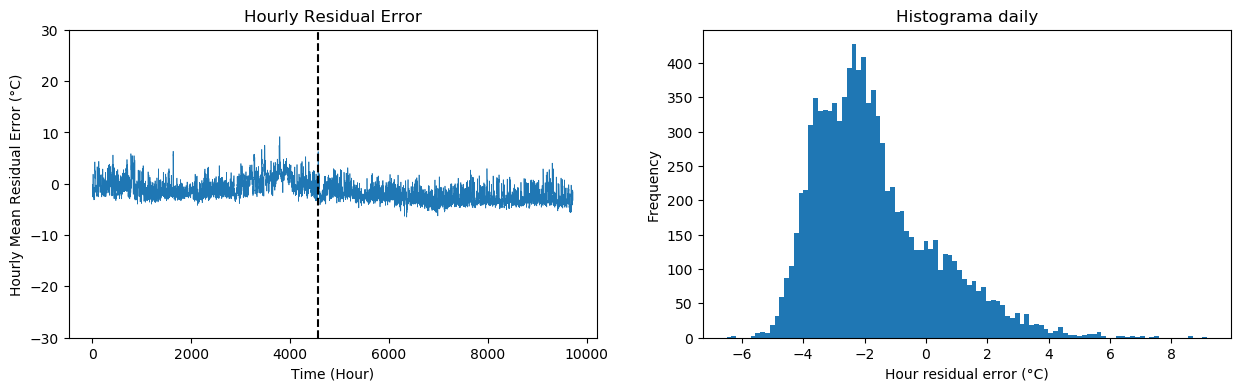

In [944]:
hour_error_batch = hour_batches_mean(error)

z = z = np.arange(1, len(hour_error_batch)+1, 1)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,4))

ax0 = ax[0].plot(z, hour_error_batch, linewidth=0.5)
ax[0].set_title('Hourly Residual Error')
ax[0].set_xlabel('Time (Hour)')
ax[0].set_ylabel('Hourly Mean Residual Error (°C)')
ax[0].set_ylim([-30, 30])
ax[0].axvline(27385/6, ls='--', c='black')

ax1 = ax[1].hist(hour_error_batch, bins=100)
ax[1].set_title('Histograma daily')
ax[1].set_xlabel('Hour residual error (°C)')
ax[1].set_ylabel('Frequency')

plt.show()

##### 5.1.3.2 Residaul Daily Batches

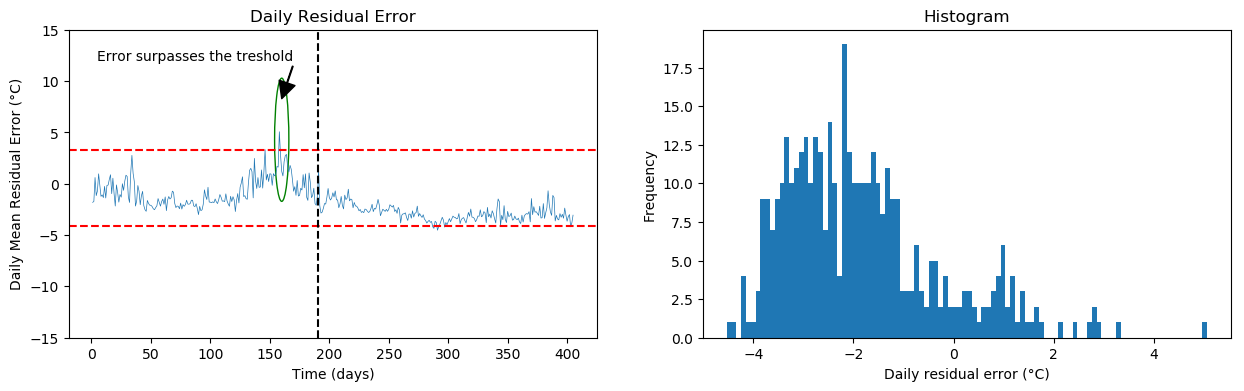

In [959]:
daily_error_batch = daily_batches_mean(error)

z = z = np.arange(1, len(daily_error_batch)+1, 1)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,4))

ax0 = ax[0].plot(z, daily_error_batch[0:len(daily_error_batch)], linewidth=0.5)
ax[0].set_title('Daily Residual Error')
ax[0].set_xlabel('Time (days)')
ax[0].set_ylabel('Daily Mean Residual Error (°C)')
ax[0].axhline(this_mean + this_std*2.5, ls='--', c='r')
ax[0].axhline(this_mean - this_std*2.5, ls='--', c='r')
ax[0].set_ylim([-15, 15])
ax[0].axvline(27385/(6*24), ls='--', c='black')
circle2 = plt.Circle((160, this_mean + this_std*2.5+1), 6, color='g', fill=False)
ax[0].add_artist(circle2)
ax[0].annotate('Error surpasses the treshold', xy=(160, this_mean + this_std*2.5+5), xytext=(5, 12),
            arrowprops=dict(facecolor='black', width = 0.5)
            )

ax1 = ax[1].hist(daily_error_batch, bins=100)
ax[1].set_title('Histogram')
ax[1].set_xlabel('Daily residual error (°C)')
ax[1].set_ylabel('Frequency')

plt.show()